 # Systems:
 - Gene network switch (pg 120, Ch 4.3)
 - Can also do repressilator model w/ 6 equations?
 - Morris-Lecar Model (pg 154 Ch 5.5 & end of Ch 3.4)
 - 1D ODE in Ch 5.1
 - Maybe check out linear systems of diff eq in 5.3.3 pg 145
 
 ## To-do
 ##### GENERAL
 - update variable names to be more descriptive/not be the same x_train all over
 - port to colab for sharing + github
 - watch pySINDy tutorials to learn how to use it
 ##### TOPICAL GOALS
 - Work mainly on network switch so far since it's easy 2D system, plots to be used for proposal
 - Aim is MSE vs. sigma plot where sigma refers to np.random.normal(mu, sigma)or equiv function
 - MSE: https://stackoverflow.com/questions/16774849/mean-squared-error-in-numpy
 - Get function from ps.SINDy() so that we can eval. it on the time tvals and get MSE
 - Look into model.simulate() in pysindy.py for getting the function as mentioned in prev. bullet point above. Used in 2d of lecture example
 - Problem with how data is set up: model.simulate() returns one solution while we have a whole 'stack' of solutions w/ noise. Maybe compare to true solution with first initial condition or average MSE?
 
 ##### post-mentor meeting on 6/29
 - reviewed phase portrait of the gene network
 - need to work on noise adding https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python
 - create training sets in array (1000, 50, 2). The 50, 2 is the solve_ivp data and we collect 1000 of those w/ different initial conditions
 - review pySINDy lecture notebook
 - look into custom library for pySINDy to account for hill functions
 - learn how to graph multiple curves (different init. cond., noise levels, etc.)

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
import pysindy as ps
from sklearn.metrics import mean_squared_error

# from matplotlib.cm import rainbow
# from scipy.io import loadmat


In [69]:
# test cell
num = 2
mu = np.zeros(num)
sigma = np.zeros((num, num))
sigmaVal = 7
np.fill_diagonal(sigma, sigmaVal)
#sigma
result = np.random.multivariate_normal(mu, sigma**2, (100, 100))
noise123 = netswitch_train_multi + result
print(type(result))
#print(netswitch_train_multi)
print("------------------------------------------------------------------------")
#print(list(noise123))
#mean_squared_error(np.array(netswitch_train_multi), noise123)
#print(np.array(netswitch_train_multi))
print("------------------------------------------------------------------------")
#print(noise123)
A = [1, 2, 3]
B = [4, 5, 6]
print(mean_squared_error(A, B))
#print(np.square(np.subtract(netswitch_train_multi, noise123)).mean())
print(((np.array(A) - B) ** 2).mean(axis=None))
print(list(noise123))

<class 'numpy.ndarray'>
------------------------------------------------------------------------
------------------------------------------------------------------------
9.0
9.0
[array([[ -0.77445839,   0.61873314],
       [  3.35288484,  -4.04587099],
       [  1.60299194,  -0.23308473],
       [ -5.94866548,  12.9088771 ],
       [ 12.36518651,   9.09245234],
       [  9.59729646,  -3.40300145],
       [  8.6609656 ,  -7.35960805],
       [-11.88360458,  15.89991997],
       [ -0.45062139,  12.04462307],
       [  0.30023364,   6.30192191],
       [  9.47363386,  -6.85088597],
       [ 16.45395924,   6.07480002],
       [ -2.8781536 ,   7.02736116],
       [  4.18821872,  -0.26530284],
       [  2.23045175,   2.49201748],
       [  9.0693257 ,   5.50101015],
       [  7.09599316,   1.06544589],
       [  3.48978833,  -3.40500407],
       [ -7.98172795,  -2.50782165],
       [-11.79763085,   3.24489059],
       [ -5.40965425,  -3.15354444],
       [ 18.01847751,  -2.71831255],
       

## Gene Network Switch

In [29]:
# contains functions + basic parameters
a_u, a_v = 1, 1
beta, gamma = 2, 2
dudt = lambda u, v: -u + (a_u / (1+v**beta))
dvdt = lambda u, v: -v + (a_v / (1+u**gamma))
sigma = 0.01
sigma_list = np.linspace(0.001, 0.8, 10)
netswitch = lambda t, x: np.array([dudt(x[0], x[1]), dvdt(x[0], x[1])])
# 0-5 minus some value between 0-1, no negatives for IC?
n_of_ic = 1000
u_ic = np.random.random(size=n_of_ic) * 5 - np.random.random(size=n_of_ic)
v_ic = np.random.random(size=n_of_ic) * 5 - np.random.random(size=n_of_ic)

def plot_data_and_derivative(x, dt, deriv):
    feature_name = ["u", "v"]
    plt.figure(figsize=(20, 5))
    for i in range(2):
        plt.subplot(1, 2, i + 1)
        plt.plot(x[:, i], label=feature_name[i])
        plt.grid(True)
        plt.xlabel("t", fontsize=24)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.legend(fontsize=24)
    x_dot = deriv(x, t=dt)
    plt.figure(figsize=(20, 5))
    for i in range(2):
        plt.subplot(1, 2, i + 1)
        plt.plot(x_dot[:, i], label=r"$\dot{" + feature_name[i] + "}$")
        plt.grid(True)
        plt.xlabel("t", fontsize=24)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.legend(fontsize=24)
library_functions = [
    lambda x: x,
    lambda x: 1 / (1 + x**1),
    lambda x: 1 / (1 + x**2),
    lambda x: 1 / (1 + x**3),
    lambda x: 1 / (1 + x**4),
    lambda x: 1 / (1 + x**5)
]
library_function_names = [
    lambda x: x,
    lambda x: '1/(1 + ' + x + '^1)',
    lambda x: '1/(1 + ' + x + '^2)',
    lambda x: '1/(1 + ' + x + '^3)',
    lambda x: '1/(1 + ' + x + '^4)',
    lambda x: '1/(1 + ' + x + '^5)'
]
netswitch_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

(u)' = -10.176 u + 4.568 1/(1 + u^2) + 13.941 1/(1 + v^2) + -3.598 1/(1 + u^3) + -2.767 1/(1 + v^3) + -7.967 1/(1 + u^4) + -5.874 1/(1 + v^4) + 7.037 1/(1 + u^5) + 5.043 1/(1 + v^5)
(v)' = -10.193 v + 14.288 1/(1 + u^2) + 4.553 1/(1 + v^2) + -2.923 1/(1 + u^3) + -3.996 1/(1 + v^3) + -6.601 1/(1 + u^4) + -7.035 1/(1 + v^4) + 5.639 1/(1 + u^5) + 6.484 1/(1 + v^5)
(500, 2)


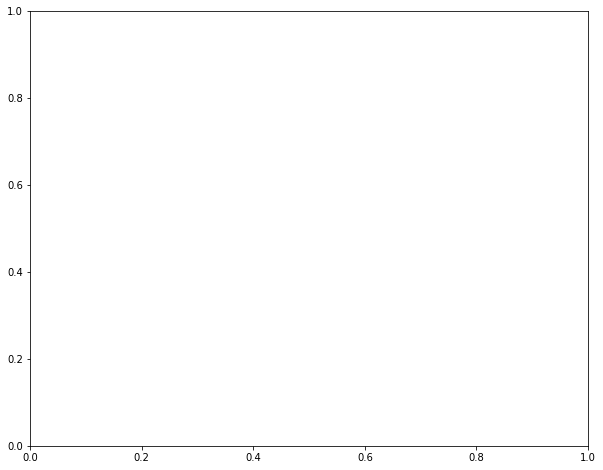

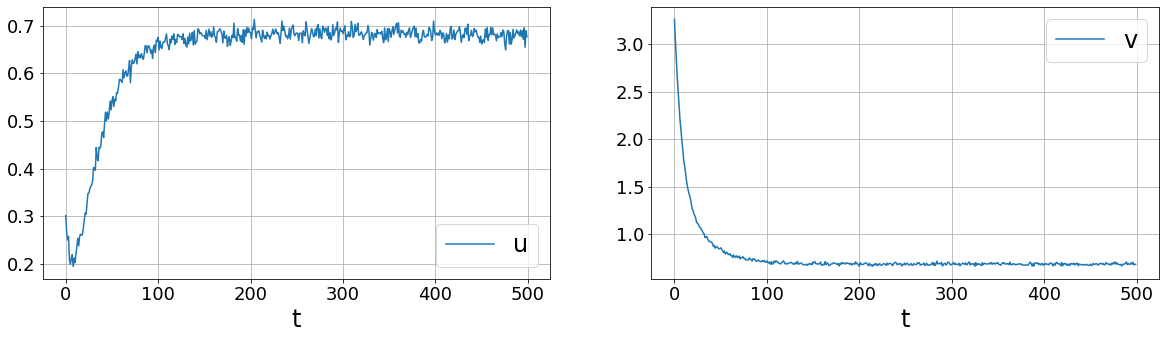

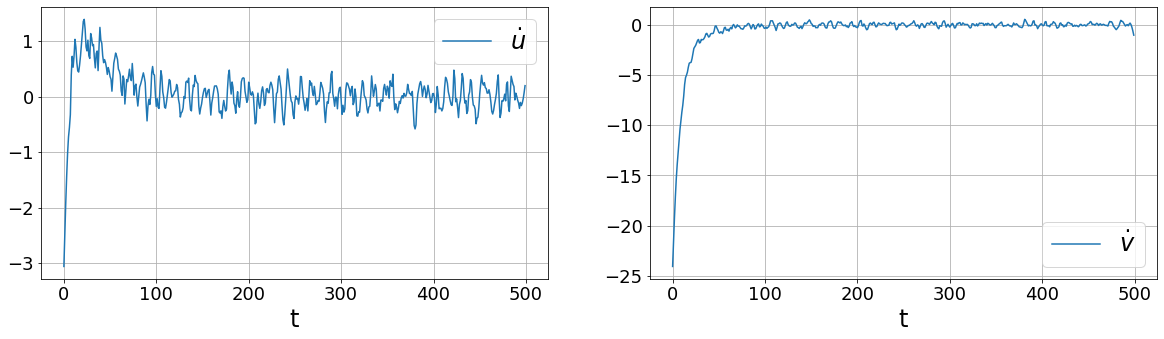

In [38]:
# Dynamic System #1 DMiB page 120
# Gene Network switch
u0 = 1
v0 = 1
T = 50
dt = 0.01
trange = np.array([0, T])
#tvals = np.arange(0, T + dt, dt)
tvals = np.linspace(0, T, 500)
fig, axs = plt.subplots(figsize=(10,8))
netswitch_x0s = (np.random.rand(n_of_ic, 2) * 5 - np.random.rand(n_of_ic, 2))
netswitch_train_multi = []
n_of_ic = 1000

# creation of data/solution
for i in range(n_of_ic): 
    #x0 = np.array([u_ic[i], v_ic[i]])
    # solve Sys #1
    #soln = solve_ivp(netswitch, trange, x0, t_eval=tvals)
    #uSoln = soln.y[0,:].reshape(-1,1)
    #vSoln = soln.y[1,:].reshape(-1,1)
    # graph 
    #axs.plot(tvals, uSoln, "r", label="$u$", **plot_kws)
    #axs.plot(tvals, vSoln, "b", label="$v$", **plot_kws)
    
    # phase portrait
    #axs.plot(uSoln, vSoln, label=f"$u_0 = {round(v_ic[i], 3)}, v_0 = {round(v_ic[i], 3)}$", alpha=0.4)
    
    # pySINDy
    # data creation
    netswitch_train_temp = solve_ivp(
        netswitch, trange, netswitch_x0s[i], t_eval=tvals
    ).y.T
    noise = np.random.normal(0, sigma, netswitch_train_temp.shape)
    netswitch_train_multi.append(netswitch_train_temp + noise)
    #netswitch_train_multi.append(netswitch_train_temp + np.random.normal(0, 0.015, netswitch_train_temp.shape))
#axs.legend()
#axs.set(xlabel="u", ylabel="$v$")
#plt.show()
#print(netswitch_train_multi)

sparse_regression_optimizer = ps.STLSQ(threshold=0.7)
model = ps.SINDy(feature_names=['u', 'v'], optimizer=sparse_regression_optimizer, feature_library=netswitch_library)
model.fit(netswitch_train_multi, t=dt, multiple_trajectories=True)
model.print()
plot_data_and_derivative(netswitch_train_multi[0], dt, ps.SmoothedFiniteDifference()._differentiate)
netswitch_sim = model.simulate(np.random.rand(2) * 5 - np.random.rand(2), t=tvals)
print(netswitch_sim.shape)
#axs.plot(tvals, netswitch_sim[, "b", label="$v$", **plot_kws)
#netswitch_train_multi = []
#MSE_result = []
#for j in range(len(sigma_list)):
#    for i in range(n_of_ic): 
#        netswitch_train_temp = solve_ivp(
#            netswitch, trange, netswitch_x0s[i], t_eval=tvals
#        ).y.T
#        noise = np.random.normal(0, sigma_list[j], netswitch_train_temp.shape)
#        netswitch_train_multi.append(netswitch_train_temp + noise)
#    sparse_regression_optimizer = ps.STLSQ(threshold=0.7)
#    model = ps.SINDy(feature_names=['u', 'v'], optimizer=sparse_regression_optimizer, feature_library=netswitch_library)
#    model.fit(netswitch_train_multi, t=dt, multiple_trajectories=True)
#    netswitch_sim = model.simulate(np.random.rand(2) * 5 - np.random.rand(2), t=tvals)
    

500
(100, 2)
[0.001      0.03252632 0.06405263 0.09557895 0.12710526 0.15863158
 0.19015789 0.22168421 0.25321053 0.28473684 0.31626316 0.34778947
 0.37931579 0.41084211 0.44236842 0.47389474 0.50542105 0.53694737
 0.56847368 0.6       ]
[0.022992304341229983, 0.022897070578433536, 0.022828896680840604, 0.02607278316801098, 0.03460117553934539, 0.0404787252345509, 0.03430019923542248, 0.027830849159103287, 0.1098332026392481, 0.1028696581871213, 0.13537057905863922, 0.4020358448245585, 0.23210213590557244, 0.24749673846395856, 0.2889273868532273, 0.3055395192818965, 0.2839888876727095, 0.2068079417551628, 0.3584692632136152, 0.20461355677530607]


Text(0.5, 0.98, 'Mean Squared Error vs. Standard Deviation in Gaussian Noise')

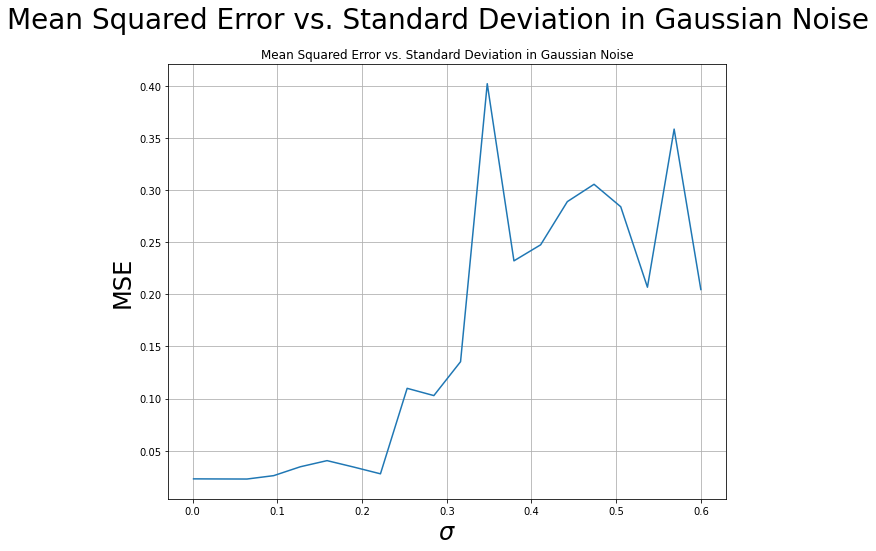

In [81]:
# actual test of model
T = 50
dt = 0.01
trange = np.array([0, T])
#tvals = np.arange(0, T + dt, dt)
tvals = np.linspace(0, T, 100)
n_of_ic = 500
fig, axs = plt.subplots(figsize=(10,8))
netswitch_x0s = (np.random.rand(n_of_ic, 2) * 5 - np.random.rand(n_of_ic, 2))
sigma = 0.01
sigma_list = np.linspace(0.001, 0.6, 20)
feature_count = 2
mu = np.zeros(feature_count)

MSE_list = []
netswitch_train_multi = []

# creation of TRUE data/solution
for i in range(n_of_ic):     
    # pySINDy
    # data creation
    netswitch_train_temp = solve_ivp(
        netswitch, trange, netswitch_x0s[i], t_eval=tvals
    ).y.T
    netswitch_train_multi.append(netswitch_train_temp)
print(len(netswitch_train_multi))
print(netswitch_train_multi[0].shape)

# train models
for j in range(len(sigma_list)):
    sigma = np.zeros((feature_count, feature_count))
    sigmaVal = sigma_list[j]
    np.fill_diagonal(sigma, sigmaVal)
    noise = np.random.multivariate_normal(mu, sigma**2, (n_of_ic, len(tvals)))
    model = ps.SINDy(feature_names=['u', 'v'], optimizer=sparse_regression_optimizer, feature_library=netswitch_library)
    model.fit(list(netswitch_train_multi + noise), t=dt, multiple_trajectories=True)
    simulations = []
    # create simulations list to hold simulated data for corresponding IC
    for k in range(n_of_ic):
        netswitch_sim = model.simulate(netswitch_x0s[k], t=tvals, integrator="odeint")
        simulations.append(netswitch_sim) 
    MSE = np.square(np.subtract(netswitch_train_multi, simulations)).mean()
    MSE_list.append(MSE)
print(sigma_list)
print(MSE_list)
axs.plot(sigma_list, MSE_list)
axs.set(xlabel="$\sigma$", ylabel="MSE", title="Mean Squared Error vs. Standard Deviation in Gaussian Noise")
plt.grid(True)
plt.xlabel("$\sigma$", fontsize=24)
plt.ylabel("MSE", fontsize=24)
fig.suptitle('Mean Squared Error vs. Standard Deviation in Gaussian Noise', fontsize=28)

## Repressilator/Gene Network Clock

[Text(0.5, 0, 't'), Text(0.5, 1.0, 'Convergent Repressilator solutions')]

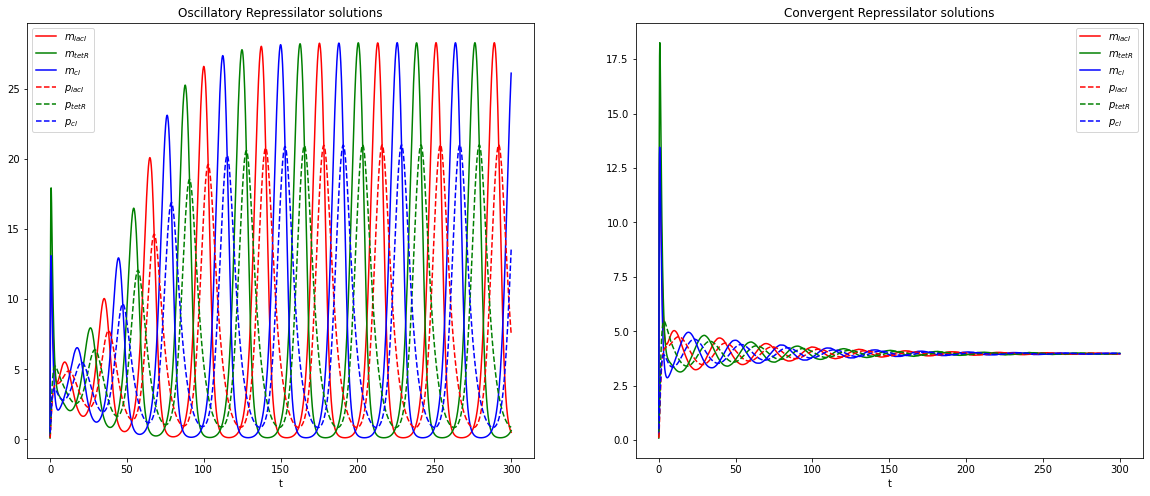

In [67]:
# General from of equations; reference pg 112
# mdot_i = -m_i + (alpha / (1+p_j**n)) + a0
# pdot_i = -beta * (p_i - m_i)
# if i = lacI, tetR, cl
# then j = cl, lacI, tetR

# is there a better way of doing this? kinda spaghetti code 
#mdot_lacI = lambda m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl: -m_lacI + (alpha / (1+p_cl**n)) + a0
#mdot_tetR = lambda m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl: -m_tetR + (alpha / (1+p_lacI**n)) + a0
#mdot_cl = lambda m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl: -m_cl + (alpha / (1+p_tetR**n)) + a0
#pdot_lacI = lambda m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl: -beta * (p_lacI - m_lacI)
#pdot_tetR = lambda m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl: -beta * (p_tetR - m_tetR)
#pdot_cl = lambda m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl: -beta * (p_cl - m_cl)

alpha=50
a0=0
n=2
beta=0.2
# x in form:
# [m_lacI, m_tetR, m_cl, p_lacI, p_tetR, p_cl]
# [0     , 1     , 2   , 3     , 4     , 5   ]
def repressilator(t, x):
    return [
        -x[0] + (alpha / (1 + x[5]**n)) + a0,
        -x[1] + (alpha / (1+x[3]**n)) + a0,
        -x[2] + (alpha / (1+x[4]**n)) + a0,
        -beta * (x[3] - x[0]),
        -beta * (x[4] - x[1]),
        -beta * (x[5] - x[2])
    ]

T = 300
dt = 0.01
trange = np.array([0, T])
tvals = np.arange(0, T + dt, dt)
x0 = np.array([0.2, 0.1, 0.3, 0.1, 0.4, 0.5])
x_train1 = solve_ivp(repressilator, trange, x0, t_eval=tvals).y

alpha=50
a0=1
n=2
beta=0.2
#T=100
trange2 = np.array([0, T])
tvals2 = np.arange(0, T + dt, dt)

x_train2 = solve_ivp(repressilator, trange2, x0, t_eval=tvals2).y

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].plot(tvals, x_train1[0, ], "r", label="$m_{lacI}$",)
axs[0].plot(tvals, x_train1[1, :], "g", label="$m_{tetR}$")
axs[0].plot(tvals, x_train1[2, :], "b", label="$m_{cl}$")
axs[0].plot(tvals, x_train1[3, :], "r--", label="$p_{lacI}$")
axs[0].plot(tvals, x_train1[4, :], "g--", label="$p_{tetR}$")
axs[0].plot(tvals, x_train1[5, :], "b--", label="$p_{cl}$")

axs[0].legend()
axs[0].set(xlabel="t", title="Oscillatory Repressilator solutions")

axs[1].plot(tvals2, x_train2[0, ], "r", label="$m_{lacI}$",)
axs[1].plot(tvals2, x_train2[1, :], "g", label="$m_{tetR}$")
axs[1].plot(tvals2, x_train2[2, :], "b", label="$m_{cl}$")
axs[1].plot(tvals2, x_train2[3, :], "r--", label="$p_{lacI}$")
axs[1].plot(tvals2, x_train2[4, :], "g--", label="$p_{tetR}$")
axs[1].plot(tvals2, x_train2[5, :], "b--", label="$p_{cl}$")

axs[1].legend()
axs[1].set(xlabel="t", title="Convergent Repressilator solutions")

## Morris-Lecar Model
    13 parameters... might be painful?? :/
    atleast it's 2D?

[Text(0.5, 0, 't'), Text(0.5, 1.0, 'Morris-Lecar solutions')]

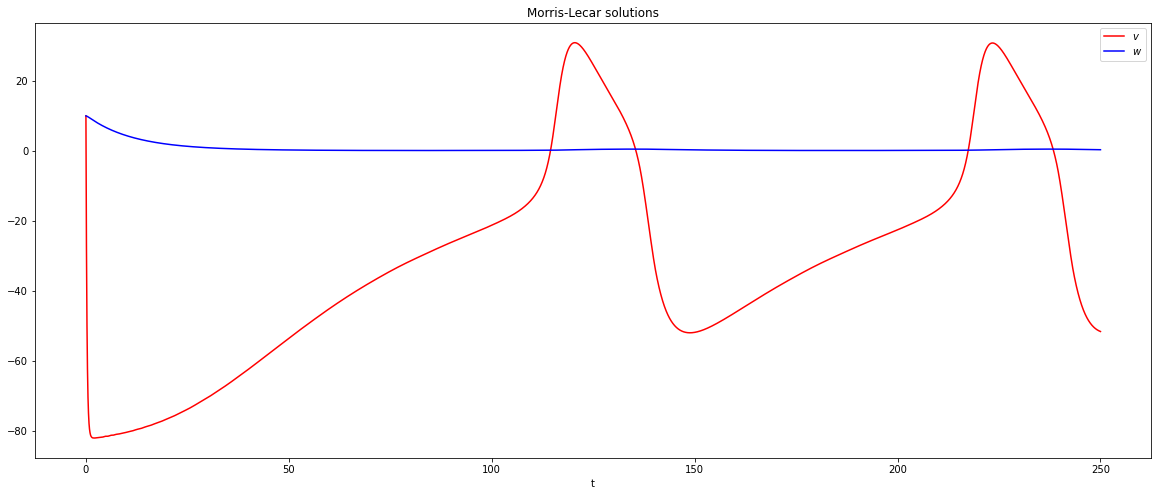

In [106]:
gCa, gK, gL, vCa, vK, vL, C, phi, i, v_1, v_2, v_3, v_4 = 4.4, 8, 2, 120, -84, -60, 20, 0.04, 90, -1.2, 18, 2, 30
# helper functions v ^ parameters
m_inf = lambda v: 0.5 * (1 + np.tanh((v - v_1) / v_2))
w_inf = lambda v: 0.5 * (1 + np.tanh((v - v_3) / v_4))
t_w = lambda v: 1 / (np.cosh((v-v_3) / (2 * v_4)))

# x = [v, w]
def morris_lecar(t, x):
    return [
        (1/C) * (i-gCa * m_inf(x[0]) * (x[0] - vCa)-gK * x[1] * (x[0]-vK) - gL * (x[0]-vL)),
        (1/t_w(x[0])) * (phi * (w_inf(x[0]) - x[1]))
    ]

T = 250
dt = 0.01
trange = np.array([0, T])
tvals = np.arange(0, T + dt, dt)
x0 = np.array([10, 10])

x_train = solve_ivp(morris_lecar, trange, x0, t_eval=tvals).y

fig, axs = plt.subplots(figsize=(20, 8))
axs.plot(tvals, x_train[0, ], "r", label="$v$")
axs.plot(tvals, x_train[1, ], "b", label="$w$")


axs.legend()
axs.set(xlabel="t", title="Morris-Lecar solutions")